











in this data analysis i will be using the rfm model to put customers in different categories so as to establish their importance.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
import xlrd



k2 = pd.ExcelFile("KPMG_VI_New_raw_data_update_final.xlsx")
k2.sheet_names

['Transactions', 'NewCustomerList', 'CustomerDemographic', 'CustomerAddress']

In [2]:
cd = k2.parse('CustomerDemographic')
cd.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0


In [3]:
cd['gender'].replace(['F', 'Femal'], 'Female', inplace=True)
cd['gender'].replace(['M'], 'Male', inplace=True)
cd['gender'].replace(['U'], 'Unknown', inplace=True)
cd['deceased_indicator'].replace(['N'], '0', inplace=True)
cd['deceased_indicator'].replace(['Y',], '1', inplace=True)
cd['owns_car'].replace(['Yes',], '1', inplace=True)
cd['owns_car'].replace(['No',], '0', inplace=True)
cd = cd[cd['DOB'] != cd.DOB.min()]
cd = cd.drop(['first_name', 'last_name', 'default', 'job_title'], axis=1)

In [4]:
cd[cd['deceased_indicator'] == 0]
cd = cd.drop(['deceased_indicator'], axis=1)
cd = cd.dropna()
cd.head()

,customer_id,gender,past_3_years_bike_related_purchases,DOB,job_industry_category,wealth_segment,owns_car,tenure
0,1,Female,93,1953-10-12,Health,Mass Customer,1,11.0
1,2,Male,81,1980-12-16,Financial Services,Mass Customer,1,16.0
2,3,Male,61,1954-01-20,Property,Mass Customer,1,15.0
3,4,Male,33,1961-10-03,IT,Mass Customer,0,7.0
5,6,Male,35,1966-09-16,Retail,High Net Worth,1,13.0


In [5]:
cd['age'] = (dt.datetime.now() - cd['DOB']) / np.timedelta64(1, 'Y')
cd['age_class'] = ((round(cd['age'] / 10)) * 10).astype(int)
cd.head()

,customer_id,gender,past_3_years_bike_related_purchases,DOB,job_industry_category,wealth_segment,owns_car,tenure,age,age_class
0,1,Female,93,1953-10-12,Health,Mass Customer,1,11.0,67.282328,70
1,2,Male,81,1980-12-16,Financial Services,Mass Customer,1,16.0,40.103125,40
2,3,Male,61,1954-01-20,Property,Mass Customer,1,15.0,67.008538,70
3,4,Male,33,1961-10-03,IT,Mass Customer,0,7.0,59.306805,60
5,6,Male,35,1966-09-16,Retail,High Net Worth,1,13.0,54.353931,50


In [6]:
ca = k2.parse('CustomerAddress')
ca['state'].replace('New South Wales', 'NSW', inplace=True)
ca['state'].replace('Victoria', 'VIC', inplace=True)
ca = ca.dropna()
ca.head()

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,NSW,Australia,10
1,2,6 Meadow Vale Court,2153,NSW,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,NSW,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9


In [7]:
cdca = pd.merge(cd, ca, on='customer_id')
cdca = cdca.dropna()
cdca.head()

,customer_id,gender,past_3_years_bike_related_purchases,DOB,job_industry_category,wealth_segment,owns_car,tenure,age,age_class,address,postcode,state,country,property_valuation
0,1,Female,93,1953-10-12,Health,Mass Customer,1,11.0,67.282328,70,060 Morning Avenue,2016,NSW,Australia,10
1,2,Male,81,1980-12-16,Financial Services,Mass Customer,1,16.0,40.103125,40,6 Meadow Vale Court,2153,NSW,Australia,10
2,4,Male,33,1961-10-03,IT,Mass Customer,0,7.0,59.306805,60,0 Holy Cross Court,4211,QLD,Australia,9
3,6,Male,35,1966-09-16,Retail,High Net Worth,1,13.0,54.353931,50,9 Oakridge Court,3216,VIC,Australia,9
4,7,Female,6,1976-02-23,Financial Services,Affluent Customer,1,11.0,44.916366,40,4 Delaware Trail,2210,NSW,Australia,9


In [8]:
t = k2.parse('Transactions')
t = t.sort_values('customer_id')
t.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
14485,14486,23,1,2017-03-27,0.0,Approved,Norco Bicycles,Mountain,low,small,688.63,612.88,33455.0
18969,18970,11,1,2017-03-29,1.0,Approved,Giant Bicycles,Standard,high,medium,1274.93,764.96,35378.0
16422,16423,9,1,2017-12-09,1.0,Approved,OHM Cycles,Road,medium,medium,742.54,667.40,37838.0
5156,5157,47,1,2017-05-11,1.0,Approved,Trek Bicycles,Road,low,small,1720.70,1531.42,37823.0
13423,13424,2,1,2017-02-21,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,38573.0


In [9]:
t['product_first_sold_date'] = pd.TimedeltaIndex(t['product_first_sold_date'], unit='d') + dt.datetime(1900,1,1)
t.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
14485,14486,23,1,2017-03-27,0.0,Approved,Norco Bicycles,Mountain,low,small,688.63,612.88,1991-08-07
18969,18970,11,1,2017-03-29,1.0,Approved,Giant Bicycles,Standard,high,medium,1274.93,764.96,1996-11-11
16422,16423,9,1,2017-12-09,1.0,Approved,OHM Cycles,Road,medium,medium,742.54,667.40,2003-08-07
5156,5157,47,1,2017-05-11,1.0,Approved,Trek Bicycles,Road,low,small,1720.70,1531.42,2003-07-23
13423,13424,2,1,2017-02-21,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,2005-08-11


In [10]:
t = t.dropna()
t.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
14485,14486,23,1,2017-03-27,0.0,Approved,Norco Bicycles,Mountain,low,small,688.63,612.88,1991-08-07
18969,18970,11,1,2017-03-29,1.0,Approved,Giant Bicycles,Standard,high,medium,1274.93,764.96,1996-11-11
16422,16423,9,1,2017-12-09,1.0,Approved,OHM Cycles,Road,medium,medium,742.54,667.40,2003-08-07
5156,5157,47,1,2017-05-11,1.0,Approved,Trek Bicycles,Road,low,small,1720.70,1531.42,2003-07-23
13423,13424,2,1,2017-02-21,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,2005-08-11


In [11]:
most_recent_purchase = t['transaction_date'].max()
t['last_purchase_days_ago'] = most_recent_purchase - t['transaction_date']
t['last_purchase_days_ago'] /= np.timedelta64(1, 'D')
t['profit'] = t['list_price'] - t['standard_cost']
t.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,last_purchase_days_ago,profit
14485,14486,23,1,2017-03-27,0.0,Approved,Norco Bicycles,Mountain,low,small,688.63,612.88,1991-08-07,278.0,75.75
18969,18970,11,1,2017-03-29,1.0,Approved,Giant Bicycles,Standard,high,medium,1274.93,764.96,1996-11-11,276.0,509.97
16422,16423,9,1,2017-12-09,1.0,Approved,OHM Cycles,Road,medium,medium,742.54,667.40,2003-08-07,21.0,75.14
5156,5157,47,1,2017-05-11,1.0,Approved,Trek Bicycles,Road,low,small,1720.70,1531.42,2003-07-23,233.0,189.28
13423,13424,2,1,2017-02-21,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,2005-08-11,312.0,17.87


In [12]:
rfmtable = t.groupby('customer_id').agg({'last_purchase_days_ago' : lambda x: x.min(), 'customer_id' : lambda x: len(x), 'profit' : lambda x: x.sum()})
rfmtable.head()

,last_purchase_days_ago,customer_id,profit
customer_id,,,
1,7.0,11,3018.09
2,128.0,3,2226.26
3,102.0,7,3290.21
4,195.0,2,220.57
5,16.0,6,2394.94


In [13]:
rfmtable.rename( columns = {'last_purchase_days_ago': 'recency', 
                            'customer_id': 'frequency', 
                            'profit' : 'monetary_value'}, 
                inplace=True)

rfmtable.head()

,recency,frequency,monetary_value
customer_id,,,
1,7.0,11,3018.09
2,128.0,3,2226.26
3,102.0,7,3290.21
4,195.0,2,220.57
5,16.0,6,2394.94


In [14]:
quartiles = rfmtable.quantile(q=[0.25,0.5,0.75])
quartiles

,recency,frequency,monetary_value
0.25,18.0,4.0,1797.43
0.50,45.0,5.0,2798.99
0.75,88.0,7.0,4122.44


In [15]:
def ROneHotEncoder(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.5]:
        return 2
    elif x <= d[p][0.75]:
        return 3
    else:
        return 4
    

def FMOneHotEncoder(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.5]:
        return 2
    elif x <= d[p][0.75]:
        return 3
    else:
        return 1 
    
    


In [16]:
rfmseg = rfmtable
rfmseg['rscore'] = rfmseg['recency'].apply(ROneHotEncoder, args = ('recency', quartiles))
rfmseg['fscore'] = rfmseg['frequency'].apply(FMOneHotEncoder, args = ('frequency', quartiles))
rfmseg['mscore'] = rfmseg['monetary_value'].apply(FMOneHotEncoder, args = ('monetary_value', quartiles))
rfmseg.head()

,recency,frequency,monetary_value,rscore,fscore,mscore
customer_id,,,,,,
1,7.0,11,3018.09,1,1,3
2,128.0,3,2226.26,4,4,2
3,102.0,7,3290.21,4,3,3
4,195.0,2,220.57,4,4,4
5,16.0,6,2394.94,1,3,2


In [17]:
rfmseg['rfmscore'] = 100*rfmseg['rscore'] + 10*rfmseg['fscore'] + rfmseg['mscore']
rfmseg['totalscore'] = rfmseg['rscore'] + rfmseg['fscore'] + rfmseg['mscore']
rfmseg.head()

,recency,frequency,monetary_value,rscore,fscore,mscore,rfmscore,totalscore
customer_id,,,,,,,,
1,7.0,11,3018.09,1,1,3,113,5
2,128.0,3,2226.26,4,4,2,442,10
3,102.0,7,3290.21,4,3,3,433,10
4,195.0,2,220.57,4,4,4,444,12
5,16.0,6,2394.94,1,3,2,132,6


In [18]:
rfmquartiles = (rfmseg['rfmscore'].min(), rfmseg['rfmscore'].quantile(q=0.25), rfmseg['rfmscore'].median(), rfmseg['rfmscore'].quantile(q=0.75), rfmseg['rfmscore'].max())
rfmquartiles

(111, 144.0, 244.0, 344.0, 444)

In [19]:
def rfmonehotencoder(x,p,d):
    if x <= d[0]:
        return 'gold'
    elif x <= d[1]:
        return 'silver'
    elif x <= d[2]:
        return 'bronze'
    else:
        return 'basic'

In [20]:
rfmseg['customertitle'] = rfmseg['rfmscore'].apply(rfmonehotencoder, args=(rfmseg['rfmscore'], rfmquartiles))
rfmseg

,recency,frequency,monetary_value,rscore,fscore,mscore,rfmscore,totalscore,customertitle
customer_id,,,,,,,,,
1,7.0,11,3018.090000,1,1,3,113,5,silver
2,128.0,3,2226.260000,4,4,2,442,10,basic
3,102.0,7,3290.210000,4,3,3,433,10,basic
4,195.0,2,220.570000,4,4,4,444,12,basic
5,16.0,6,2394.940000,1,3,2,132,6,silver
...,...,...,...,...,...,...,...,...,...
3497,52.0,3,1648.320000,3,4,4,344,11,basic
3498,127.0,6,3147.330000,4,3,3,433,10,basic
3499,51.0,7,4955.250000,3,3,1,331,7,basic


In [21]:
addr_demo_txns = pd.merge(rfmseg, cdca, left_index=True, right_index=True)
addr_demo_txns.columns

Index(['recency', 'frequency', 'monetary_value', 'rscore', 'fscore', 'mscore',
       'rfmscore', 'totalscore', 'customertitle', 'customer_id', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_industry_category',
       'wealth_segment', 'owns_car', 'tenure', 'age', 'age_class', 'address',
       'postcode', 'state', 'country', 'property_valuation'],
      dtype='object')

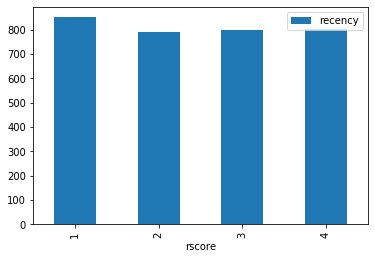

In [22]:
addr_demo_txns.groupby('rscore').agg('recency').count().to_frame().plot(kind='bar')

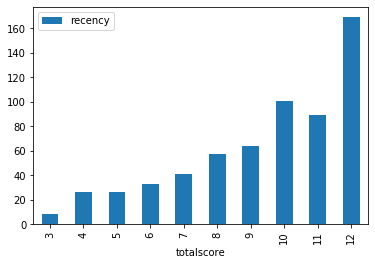

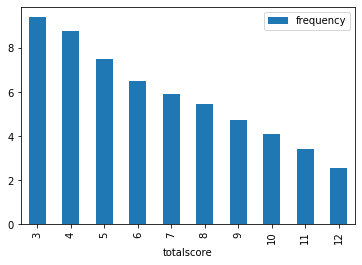

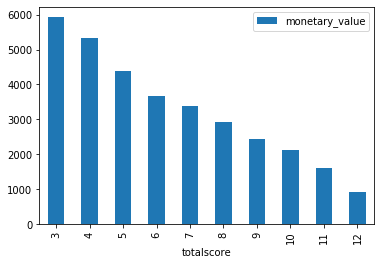

In [24]:
addr_demo_txns.groupby('totalscore').agg('recency').mean().to_frame().plot(kind='bar')
addr_demo_txns.groupby('totalscore').agg('frequency').mean().to_frame().plot(kind='bar')
addr_demo_txns.groupby('totalscore').agg('monetary_value').mean().to_frame().plot(kind='bar')
plt.show()

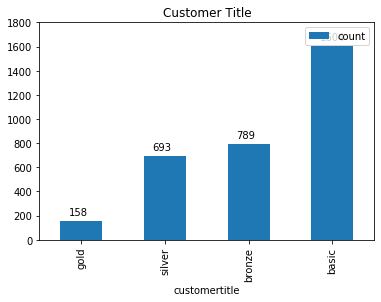

In [28]:
customer_titles_df = addr_demo_txns.groupby('customertitle').agg({
    'rfmscore': lambda x: len(x)
})
customer_titles_df.rename(columns={'rfmscore': 'count'}, inplace=True)
customer_titles_df.sort_values('count').plot(kind='bar')
for i, v in enumerate(customer_titles_df.sort_values('count')['count']):
    plt.text(i - .15, v + 50, int(v), color='black')
axes = plt.gca()
axes.set_ylim([0, 1800])
plt.title('Customer Title')
plt.show()

if you come across this analysis, you are free to send a message if you need further clarification